# Définition

Bibliothèque permettant de déployer des outils statistiques utiles pour le machine learning dans du code python ; basé sur Numpy et Scipy.

# Analyse prédictive

## Importation des données

In [ ]:
#utilisation de la librairie Pandas spécialisée - entres autres - dans la manipulation des données
import pandas as pd
from sklearn import datasets
pima = pd.read_table("http://eric.univ-lyon2.fr/~rrado/files/pima.txt",sep="\t",header=0)
# pima = datasets.load_diabetes(return_X_y=False, as_frame=False)

print(pima)

#dimensions
print(pima.shape)

#liste des colonnes
print(pima.columns)

#liste des colonnes et leurs types
print(pima.dtypes)

     pregnant  diastolic  triceps  bodymass  pedigree  age  plasma  serum  \
0           6         72       35      33.6     0.627   50     148      0   
1           1         66       29      26.6     0.351   31      85      0   
2           8         64        0      23.3     0.672   32     183      0   
3           1         66       23      28.1     0.167   21      89     94   
4           0         40       35      43.1     2.288   33     137    168   
..        ...        ...      ...       ...       ...  ...     ...    ...   
763        10         76       48      32.9     0.171   63     101    180   
764         2         70       27      36.8     0.340   27     122      0   
765         5         72       23      26.2     0.245   30     121    112   
766         1         60        0      30.1     0.349   47     126      0   
767         1         70       31      30.4     0.315   23      93      0   

      diabete  
0    positive  
1    negative  
2    positive  
3    negati

# Subdivision en échantillons d'apprentissage et de test

In [ ]:
#transformation en matrice numpy
data = pima.values

#X matrice des var. explicatives
X = data[:,0:8]

#y vecteur de la var. à prédire
y = data[:,8]

#utilisation du module model_selection de scikit-learn (sklearn)
from sklearn import model_selection

#subdivision des données – éch.test = 300 ; éch.app = 768 – éch.test = 468
X_app,X_test,y_app,y_test = model_selection.train_test_split(X,y,test_size = 300,random_state=0)

print(X_app.shape,X_test.shape,y_app.shape,y_test.shape)

(468, 8) (300, 8) (468,) (300,)


## Construction du modèle sur l’échantillon d’apprentissage

In [ ]:

#à partir du module linear_model du package sklearn
#importer la classe LogisticRegression
from sklearn.linear_model import LogisticRegression

#création d'une instance de la classe
lr = LogisticRegression(solver="liblinear")

#exécution de l'instance sur les données d'apprentissage
#c.à-d. construction du modèle prédictif
modele = lr.fit(X_app,y_app)

#les sorties sont très pauvres à la différence des logiciels de stat
#les coefficients...
print(modele.coef_,modele.intercept_)

[[ 8.75153769e-02 -1.59511103e-02  1.70428483e-03  5.18609374e-02
   5.34696503e-01  1.24335202e-02  2.40115458e-02 -2.91586161e-04]] [-5.13527961]


## Prédiction et évaluation sur l’échantillon test

In [ ]:
#prediction sur l'échantillon test
y_pred = modele.predict(X_test)

#importation de metrics - utilisé pour les mesures de performances
from sklearn import metrics

#matrice de confusion
#confrontation entre Y obs. sur l’éch. test et la prédiction
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

#taux de succès
acc = metrics.accuracy_score(y_test,y_pred)
print(acc) # 0.793 = (184 + 54)/ (184 + 17 + 45 + 54)

#taux d'erreur
err = 1.0 - acc
print(err) # 0.206 = 1.0 – 0.793

#sensibilité (ou rappel)
se = metrics.recall_score(y_test,y_pred,pos_label='positive')
print(se) # 0.545 = 54 / (45+ 54)

[[184  17]
 [ 45  54]]
0.7933333333333333
0.20666666666666667
0.5454545454545454


## Construction de sa propre mesure de performance (ex. Spécificité)

In [ ]:
#écrire sa propre func. d'éval - ex. specificité
def specificity(y,y_hat):
    #matrice de confusion – un objet numpy.ndarray
    mc = metrics.confusion_matrix(y,y_hat)
    #"negative" est sur l'indice 0 dans la matrice
    import numpy
    res = mc[0,0]/numpy.sum(mc[0,:])
    #retour
    return res

#la rendre utilisable - transformation en objet scorer
specificite = metrics.make_scorer(specificity,greater_is_better=True)

#utilisation de l’objet scorer
#remarque : modele est le modèle élaboré sur l’éch. d’apprentissage
sp = specificite(modele,X_test,y_test)
print(sp) # 0.915 = 184 / (184 + 17)

0.9154228855721394


# Pourquoi la validation croisée

In [ ]:
#importer la classe LogisticRegression
from sklearn.linear_model import LogisticRegression

#création d'une instance de la classe
lr = LogisticRegression(solver="liblinear")

#exécution de l'instance sur la totalité des données (X,y)
modele_all = lr.fit(X,y)

#affichage
print(modele_all.coef_,modele_all.intercept_)# [[  1.17056955e-01  -1.69020125e-02   7.53362852e-04   5.96780492e-02 6.77559538e-01   7.21222074e-03   2.83668010e-02  -6.41169185e-04]] [-5.8844014]

# !!! Les coefficients sont différents de ceux estimés sur l’éch. d’apprentissage (on a plus d’obs. ici) !!!
#utilisation du module model_selection
from sklearn import model_selection

#évaluation en validation croisée : 10 cross-validation
succes = model_selection.cross_val_score(lr,X,y,cv=10,scoring='accuracy')

#détail des itérations
print(succes)

#moyenne des taux de succès = estimation du taux de succès en CV
print(succes.mean()) # 0.767

[[ 1.17087631e-01 -1.68947770e-02  7.46053001e-04  5.97221654e-02
   6.81392866e-01  7.21999666e-03  2.83788475e-02 -6.42978367e-04]] [-5.88988049]
[0.74025974 0.75324675 0.79220779 0.72727273 0.74025974 0.74025974
 0.81818182 0.79220779 0.73684211 0.82894737]
0.7669685577580314


# Scoring - Ciblage

In [ ]:
#classe Régression Logistique
from sklearn.linear_model import LogisticRegression

#création d'une instance de la classe
lr = LogisticRegression(solver="liblinear")

#modélisation sur les données d'apprentissage
modele = lr.fit(X_app,y_app)

#calcul des probas d'affectation sur ech. test
probas = lr.predict_proba(X_test)

#score de 'presence'
score = probas[:,1] # [0.86238322  0.21334963  0.15895063 ...]

#transf. en 0/1 de Y_test
pos = pandas.get_dummies(y_test).values

#on ne récupère que la 2è colonne (indice 1)
pos = pos[:,1] # [ 1  0  0  1  0  0  1  1 ...]

#nombre total de positif
import numpy
npos = numpy.sum(pos) # 99 – il y a 99 ind. ‘’positifs’’  dans l’échantillon test

In [ ]:
#index pour tri selon le score croissant
index = numpy.argsort(score) # [ 55  45  265  261 ... 11  255  159]

#inverser pour score décroissant – on s’intéresse à forte proba. en priorité
index = index[::-1] # [ 159  255  11 ... 261  265  45  55 ]

#tri des individus (des valeurs 0/1)
sort_pos = pos[index] # [ 1  1  1  1  1  0  1  1 ...]

#somme cumulée
cpos = numpy.cumsum(sort_pos) # [ 1  2  3  4  5  5  6 7 ... 99]

#rappel
rappel = cpos/npos # [ 1/99  2/99  3/99  4/99  5/99  5/99  6/99  7/99 ... 99/99]

#nb. obs ech.test
n = y_test.shape[0] # 300, il y a 300 ind. dans l’éch. test

#taille de cible – séquence de valeurs de 1 à 300 avec un pas de 1
taille = numpy.arange(start=1,stop=301,step=1) # [1  2  3  4  5  ...  300]

#passer en proportion
taille = taille / n # [ 1/300  2/300  3/300 ... 300/300 ]

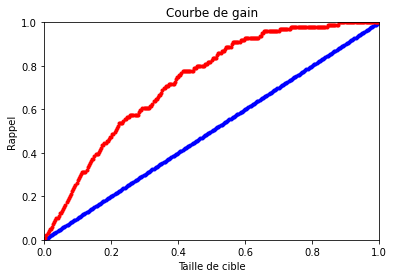

In [ ]:
#graphique avec matplotlib
import matplotlib.pyplot as plt

#titre et en-têtes
plt.title('Courbe de gain')
plt.xlabel('Taille de cible')
plt.ylabel('Rappel')

#limites en abscisse et ordonnée
plt.xlim(0,1)
plt.ylim(0,1)

#astuce pour tracer la diagonale
plt.scatter(taille,taille,marker='.',color='blue')

#insertion du couple (taille, rappel)
plt.scatter(taille,rappel,marker='.',color='red')

#affichage
plt.show()

# Grid Search

In [ ]:
#svm
from sklearn import svm

#par défaut un noyau RBF et C = 1.0
mvs = svm.SVC()

#modélisation
modele2 = mvs.fit(X_app,y_app)

#prédiction ech. test
y_pred2 = modele2.predict(X_test)

#matrice de confusion
print(metrics.confusion_matrix(y_test,y_pred2))

#succès en test
print(metrics.accuracy_score(y_test,y_pred2)) # 0.67

[[184  17]
 [ 57  42]]
0.7533333333333333


In [ ]:
from sklearn import model_selection

#combinaisons de paramètres à évaluer
parametres = [{'C':[0.1,1,10],'kernel':['rbf','linear']}]

#évaluation en validation croisée de 3 x 2 = 6 configurations
#accuracy sera le critère à utiliser pour sélectionner la meilleure config
#mvs est l’instance de la classe svm.SVC (cf. page précédente)
grid = model_selection.GridSearchCV(estimator=mvs,param_grid=parametres,scoring='accuracy')

#lancer la recherche – attention, gourmand en calculs
grille = grid.fit(X_app,y_app)

#résultat pour chaque combinaison
print(pandas.DataFrame.from_dict(grille.cv_results_).loc[:,["params","mean_test_score"]]) 

#meilleur paramétrage
print(grille.best_params_) # {‘C’ : 10, ‘kernel’ : ‘linear’}

#meilleur performance – estimée en interne par validation croisée
print(grille.best_score_) # 0.7564

#prédiction avec le modèle « optimal » c.-à-d. {‘C’ : 10, ‘kernel’ : ‘linear’}
y_pred3 = grille.predict(X_test)

#taux de succès en test
print(metrics.accuracy_score(y_test,y_pred3)) # 0.7833, on se rapproche de la rég. logistique

                           params  mean_test_score
0     {'C': 0.1, 'kernel': 'rbf'}         0.647449
1  {'C': 0.1, 'kernel': 'linear'}         0.762755
2       {'C': 1, 'kernel': 'rbf'}         0.749989
3    {'C': 1, 'kernel': 'linear'}         0.762755
4      {'C': 10, 'kernel': 'rbf'}         0.728552
5   {'C': 10, 'kernel': 'linear'}         0.760604
{'C': 0.1, 'kernel': 'linear'}
0.7627545184168383
0.7866666666666666


# Sélection de variables

In [ ]:
#importer la classe LogisticRegression
from sklearn.linear_model import LogisticRegression

#création d'une instance de la classe
lr = LogisticRegression(solver="liblinear")

#algorithme de sélection de var.
from sklearn.feature_selection import RFE
selecteur = RFE(estimator=lr)

#lancer la recherche
sol = selecteur.fit(X_app,y_app)

#nombre de var. sélectionnées
print(sol.n_features_) # 4 →4 = 8 / 2 variables sélectionnées

#liste des variables sélectionnées
print(sol.support_) # [True False False True True False True False ]

#ordre de suppression
print(sol.ranking_) # [1  2  4  1  1  3  1  5]

4
[ True False False  True  True False  True False]
[1 2 4 1 1 3 1 5]


In [ ]:
#réduction de la base d'app. aux var. sélectionnées
#en utilisant le filtre booléen sol.support_
X_new_app = X_app[:,sol.support_]
print(X_new_app.shape) # (468, 4) →4 variables restantes

#construction du modèle sur les explicatives sélectionnées
modele_sel = lr.fit(X_new_app,y_app)

#réduction de la base test aux mêmes variables
X_new_test = X_test[:,sol.support_]
print(X_new_test.shape) # (300, 4)

#prédiction du modèle réduit sur l’éch. test
y_pred_sel = modele_sel.predict(X_new_test)

#évaluation
print(metrics.accuracy_score(y_test,y_pred_sel)) # 0.787

(468, 4)
(300, 4)
0.7866666666666666
